# ***THIS NOTEBOOK COMPARES THE CUBIC INTERPOLATIONS OF SCIPY AND TENSORFLOW***
---
---
---
---
---

We begin by making a neural network reproduce the ground state of a harmonic oscillator. Then we compute the mean (over all points on the x axis) of the absolute value of the difference between the ground state and its reproduction. We do the same with the cubic interpolations.

Note that there are 1003 points along x in the beginning but as Tensorflow removes 3 points (cubic spline), we compute a mean over 1000 points (same for SciPy even though it is not necessary)

# IMPORTS AND GLOBAL VARIABLES (don't forget to install tensorflow_graphics)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

from keras import layers, models, optimizers

#!pip install tensorflow_graphics
import tensorflow as tf
from tensorflow_graphics.math.interpolation import bspline

from scipy import integrate
from scipy import interpolate

hbar = 1
omega = 1
m = 1
a = -5
b = 5

# DATA GENERATION

In [16]:
############
#SECTION : OPENING FILES (writing the mean of the absolute value of the difference)
############
file1 = open("diff_nn.txt", "w")
file2 = open("diff_sp.txt", "w")
file3 = open("diff_tf.txt", "w")



############
#SECTION : COMPUTING WAVE FUNCTION (1003 and 1000 points along x)
############

pts=1003
h = 10/pts
linx = np.linspace (a,b,pts) #x axis with 1003 points
norm = np.zeros_like(linx, dtype=float) #1003 points wafe function
x=-5.
for i in range(0,pts):
  norm[i] = pow(m*omega/(math.pi*hbar),0.25)*math.exp(-m*omega*(pow(x,2))/(2*hbar))
  x+=h


linx_1000 = np.linspace (a,b,pts-3) #x axis with 1000 points
x=-5.
norm_1000 = np.zeros_like(linx_1000, dtype=float) #1000 points wave function
for i in range(0,pts-3):
  norm_1000[i] = pow(m*omega/(math.pi*hbar),0.25)*math.exp(-m*omega*(pow(x,2))/(2*hbar))
  x+=h




############
#SECTION : COMPUTING THE MEANS
############

#number of runs we want
runs = 30
#arrays for mean of the absolute value of the difference
diff_nn = np.zeros((runs,1)) #Neural network prediction
diff_sp = np.zeros((runs,1)) #SciPy interp. of prediction
diff_tf = np.zeros((runs,1)) #Tensorflow interp. of prediction

for j in range(0,runs):
  print('run #',j+1)

  #INITIALIZATION OF NEURAL NETWORK
  model = models.Sequential([
    layers.Dense(200, input_shape=(1,), activation='relu'),
    layers.Dense(200, input_shape=(1,), activation='relu'), 
    layers.Dense(1),
  ])
  #model.summary()
  opt = optimizers.Adam(learning_rate=0.001)
  model.compile(loss='mse',optimizer=opt)


  #Loop to compute the interpolations and the means
  for k in range(0,points):

    #neural network training (45 epochs on each run) and prediction
    model.fit(linx, norm, epochs=45, batch_size=50,verbose=0)
    predictions = model.predict(linx)
    preds = predictions.reshape(-1)

    """
    """
    #SCIPY interpolation of prediction - 1000 points
    #cubic interpolation
    tck_nn_sp = interpolate.splrep(linx, preds, k=3, s=0)
    #spline 1000 points
    spline_nn_sp = interpolate.splev(linx_1000, tck_nn_sp, der=0)
    
    """
    """
    #Tensorflow interpolation of prediction - 1000 points
    degre = 3 #cubic spline
    max_pos = pts-3 #tensorflow removes 3 points from the original array
    # knots and position of knots
    knots_nn = tf.constant((linx,preds))
    positions = tf.expand_dims(tf.range(start=0.0, limit=max_pos, delta=1, dtype=knots_nn.dtype), axis=-1)
    # interpolation
    tck_nn_tf = bspline.interpolate(knots_nn, positions, cyclical=False, degree = degre)
    #splines 1000 points
    spline_nn_tf = tf.squeeze(tck_nn_tf, axis=1)

    """
    """
    #Computing means of the absolute value of the difference between
    #the ground state, the network prediction and the cubic interpolations of the prediction
    diff_nn[j] = np.sum(np.abs(norm-preds))/1003
    diff_sp[j] = np.sum(np.abs(norm_1000-spline_nn_sp))/1000
    diff_tf[j] = np.sum(np.abs(norm_1000-spline_nn_tf[:,1]))/1000


#Diff N.N.
np.savetxt(file1, diff_nn, fmt='%.18e', delimiter='', newline='\n')
#Diff SciPy
np.savetxt(file2, diff_sp, fmt='%.18e', delimiter='', newline='\n')
#Diff Tensorflow
np.savetxt(file3, diff_tf, fmt='%.18e', delimiter='', newline='\n')

file1.close()
file2.close()
file3.close()

run # 1
run # 2
run # 3
run # 4
run # 5
run # 6
run # 7
run # 8
run # 9
run # 10
run # 11
run # 12
run # 13
run # 14
run # 15
run # 16
run # 17
run # 18
run # 19
run # 20
run # 21
run # 22
run # 23
run # 24
run # 25
run # 26
run # 27
run # 28
run # 29
run # 30


# PLOT

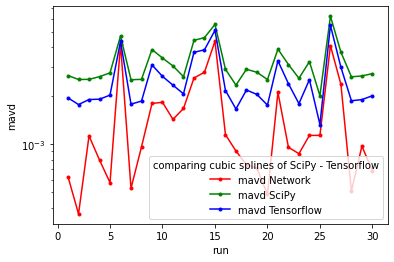

<Figure size 432x288 with 0 Axes>

In [17]:
#OPENING FILES
file1 = open("diff_nn.txt", "r")
file2 = open("diff_sp.txt", "r")
file3 = open("diff_tf.txt", "r")

with open('diff_nn.txt') as f:
    lines1 = f.readlines()
    diff_nn = np.array([float(line.split()[0]) for line in lines1])
with open('diff_sp.txt') as f:
    lines2 = f.readlines()
    diff_sp = np.array([float(line.split()[0]) for line in lines2])
with open('diff_tf.txt') as f:
    lines3 = f.readlines()
    diff_tf = np.array([float(line.split()[0]) for line in lines3])


array_runs = np.arange(1,31)     #array of the number of runs (x axis on plot)

#mavd stands for 'mean of the absolute value of the difference'
plt.yscale('log')
plt.plot(array_runs,diff_nn,marker='.',c='r', label='mavd Network')
plt.plot(array_runs,diff_sp,marker='.',c='g', label='mavd SciPy')
plt.plot(array_runs,diff_tf,marker='.',c='b', label='mavd Tensorflow')
plt.ylabel('mavd')
plt.xlabel('run')
plt.legend(title = 'comparing cubic splines of SciPy - Tensorflow')
plt.savefig('Tf_vs_SciPy_vs_NN.pdf')
plt.show()
plt.clf()